In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
    "axes.labelsize": 9,
    "font.size": 9,
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "axes.spines.top": False,
    "axes.spines.right": False,
})

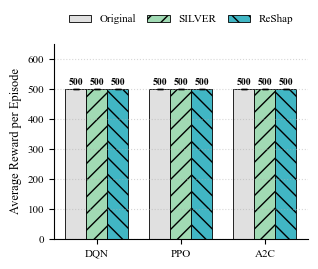

In [5]:
algorithms = ["DQN", "PPO", "A2C"]
models = ["Original", "SILVER", "ReShap"]
# Professional, distinct color palette
colors = ["#e0e0e0", "#a1dab4", "#41b6c4"] 
hatches = ["", "//", "\\\\"] # Textures for grayscale readability

means = {alg: [] for alg in algorithms}
cis = {alg: [] for alg in algorithms}

for alg in algorithms:
    for model in models:
        # Load logic from your source
        suffix = "result_np.npy"
        fname = f"./{alg}_{suffix}" if model == "Original" else f"./{alg}_{model}_{suffix}"
        
        try:
            vals = np.load(fname)
            m = np.mean(vals)
            s = np.std(vals, ddof=1)
            ci = 1.96 * s / np.sqrt(len(vals))
        except FileNotFoundError:
            # Placeholder for missing files during dev
            m, ci = 0, 0
            
        means[alg].append(m)
        cis[alg].append(ci)

x = np.arange(len(algorithms))
width = 0.25 

fig, ax = plt.subplots(figsize=(3.25, 2.8))

for i, model in enumerate(models):
    # Centering 3 bars correctly: offsets -width, 0, +width
    offset = (i - 1) * width 
    
    bars = ax.bar(
        x + offset,
        [means[alg][i] for alg in algorithms],
        width,
        yerr=[cis[alg][i] for alg in algorithms],
        capsize=2,
        error_kw={'lw': 0.8},
        label=model,
        color=colors[i],
        edgecolor='black',
        linewidth=0.6,
        hatch=hatches[i]
    )

    # Numerical annotations (cleaner formatting)
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width()/2,
                height + 5, 
                f"{height:.0f}", 
                ha="center", va="bottom", fontsize=7, fontweight='bold'
            )

# Final Polish
ax.set_ylabel("Average Reward per Episode")
ax.set_xticks(x)
ax.set_xticklabels(algorithms)

# Legend placed on top for space efficiency
ax.legend(
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.2), 
    frameon=False, 
    ncol=3,
    columnspacing=1.0
)

# Subtle grid for readability
ax.yaxis.grid(True, linestyle=':', alpha=0.5)

# Adjust y-axis to accommodate labels and legend
max_h = max([max(v) for v in means.values()]) if means["DQN"] else 200
ax.set_ylim(0, max_h * 1.3)

plt.tight_layout()
plt.savefig('cartpole_comparison_icml.pdf', bbox_inches='tight', dpi=600)
plt.show()